In [57]:
# Requirement 1: Data Preparation
import pandas as pd
import zipfile
import os

# Unzip the dataset
with zipfile.ZipFile("netflix_data.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

# Load and rename the dataset

data = pd.read_csv(r"C:\Users\user\Documents\netflix_data.csv")
#Renaming the dataset to Netflix_shows_movies
Netflix_shows_movies = data

In [58]:
Netflix_shows_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [60]:
#  Requirement 2: Data Cleaning
# Check missing values
missing_summary = Netflix_shows_movies.isnull().sum()

# Fill or drop missing values based on context
Netflix_shows_movies.fillna({'rating': 'Not Rated', 'genre': 'Unknown'}, inplace=True)
Netflix_shows_movies.dropna(subset=['title'], inplace=True)  # Assuming title is essential

In [61]:
#  Requirement 3: Data Exploration
# Overview
print(Netflix_shows_movies.info())

# Summary statistics
print(Netflix_shows_movies.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6234 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB
None
             show_id   type        title                director  \
count   6.234000e+03   6234         6234                    4265   
unique           NaN      2         6172                    3301   
top              NaN  Movie  The Silence  R

Column 'genre' not found in DataFrame.


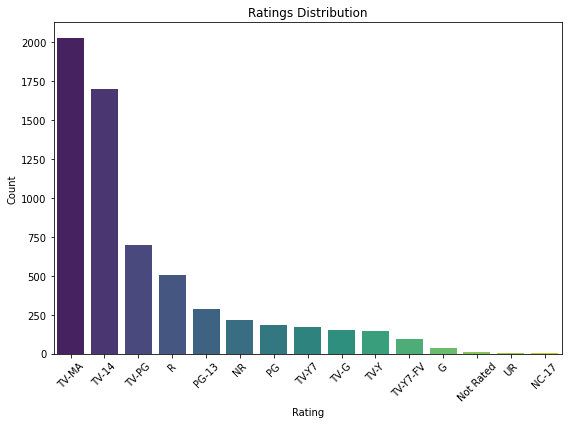

In [63]:
# Requirement 4: Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Check if required columns exist
if 'genre' in Netflix_shows_movies.columns:
    # Most watched genres (Top 10)
    plt.figure(figsize=(10, 6))
    Netflix_shows_movies['genre'].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title("Top 10 Most Watched Genres")
    plt.xlabel("Genre")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'genre' not found in DataFrame.")

# Ratings distribution
if 'rating' in Netflix_shows_movies.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=Netflix_shows_movies, x='rating', order=Netflix_shows_movies['rating'].value_counts().index, palette='viridis')
    plt.title("Ratings Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'rating' not found in DataFrame.")
